In [186]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df = pd.read_csv("../input/pantheon-project/database.csv")

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   article_id                   11341 non-null  int64  
 1   full_name                    11341 non-null  object 
 2   sex                          11341 non-null  object 
 3   birth_year                   11341 non-null  object 
 4   city                         11341 non-null  object 
 5   state                        2172 non-null   object 
 6   country                      11308 non-null  object 
 7   continent                    11311 non-null  object 
 8   latitude                     10294 non-null  float64
 9   longitude                    10294 non-null  float64
 10  occupation                   11341 non-null  object 
 11  industry                     11341 non-null  object 
 12  domain                       11341 non-null  object 
 13  article_language

In [189]:
df.head()

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [190]:
df.set_index("birth_year")

,article_id,full_name,sex,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
birth_year,,,,,,,,,,,,,,,,
-384,308,Aristotle,Male,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
-427,22954,Plato,Male,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
-4,1095706,Jesus Christ,Male,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
-469,25664190,Socrates,Male,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
-356,783,Alexander the Great,Male,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,5891391,Sean St Ledger,Male,Solihull,NaN,United Kingdom,Europe,52.41290,-1.77209,Soccer Player,Team Sports,Sports,28,380965,13606,11.1346
1990,5322451,Saina Nehwal,Female,Hisar,NaN,India,Asia,29.16670,75.71670,Athlete,Individual Sports,Sports,26,2255010,86731,10.6122
1997,33525706,Rūta Meilutytė,Female,Kaunas,NaN,Lithuania,Europe,54.90000,23.88611,Swimmer,Individual Sports,Sports,32,342719,10710,10.3821


In [191]:
df.set_index("industry")

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,domain,article_languages,page_views,average_views,historical_popularity_index
industry,,,,,,,,,,,,,,,,
Philosophy,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Humanities,152,56355172,370758,31.9938
Philosophy,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Humanities,142,46812003,329662,31.9888
Religion,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Institutions,214,60299092,281771,31.8981
Philosophy,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Humanities,137,40307143,294213,31.6521
Military,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Institutions,138,48358148,350421,31.5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Team Sports,5891391,Sean St Ledger,Male,1984,Solihull,NaN,United Kingdom,Europe,52.41290,-1.77209,Soccer Player,Sports,28,380965,13606,11.1346
Individual Sports,5322451,Saina Nehwal,Female,1990,Hisar,NaN,India,Asia,29.16670,75.71670,Athlete,Sports,26,2255010,86731,10.6122
Individual Sports,33525706,Rūta Meilutytė,Female,1997,Kaunas,NaN,Lithuania,Europe,54.90000,23.88611,Swimmer,Sports,32,342719,10710,10.3821


In [192]:
df.loc[df["continent"]=="Europe"]

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840
5,18079,Leonardo da Vinci,Male,1452,Vinci,NaN,Italy,Europe,43.78333,10.91667,Inventor,Invention,Science & Technology,174,88931135,511098,31.4644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11332,3958892,Shane Long,Male,1987,Gortnahoe,NaN,Ireland,Europe,NaN,NaN,Soccer Player,Team Sports,Sports,26,799202,30739,11.7174
11335,32941975,Jetro Willems,Male,1994,Rotterdam,NaN,Netherlands,Europe,51.91667,4.50000,Soccer Player,Team Sports,Sports,27,577913,21404,11.3956
11336,5891391,Sean St Ledger,Male,1984,Solihull,NaN,United Kingdom,Europe,52.41290,-1.77209,Soccer Player,Team Sports,Sports,28,380965,13606,11.1346
11338,33525706,Rūta Meilutytė,Female,1997,Kaunas,NaN,Lithuania,Europe,54.90000,23.88611,Swimmer,Individual Sports,Sports,32,342719,10710,10.3821


In [193]:
df.sort_values(by=["birth_year"])

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
337,9196752,"James, son of Alphaeus",Male,-1,Galilee,NaN,Israel,Asia,32.76000,35.5270,Religious Figure,Religion,Institutions,53,678914,12810,27.4029
105,59172,Judas Iscariot,Male,-1,Other,NaN,Unknown,NaN,NaN,NaN,Religious Figure,Religion,Institutions,63,11142102,176859,28.7693
1307,28018,Simon Magus,Male,-1,Other,NaN,Unknown,Unknown,NaN,NaN,Religious Figure,Religion,Institutions,29,1170101,40348,25.7150
201,6140,Claudius,Male,-10,Lyon,NaN,France,Europe,45.76000,4.8400,Politician,Government,Institutions,71,5783578,81459,27.9662
2372,68601,Agrippa I,Male,-10,Other,NaN,Unknown,Unknown,NaN,NaN,Politician,Government,Institutions,27,742179,27488,24.8662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,20596,Mieszko II Lambert,Male,990,Other,NaN,Unknown,Unknown,NaN,NaN,Politician,Government,Institutions,32,866987,27093,24.1020
1360,69402,Guido d'Arezzo,Male,991,Paris,NaN,France,Europe,48.85670,2.3508,Composer,Music,Arts,38,1299635,34201,25.6610
2176,150695,Olaf II of Norway,Male,995,Ringerike,NaN,Norway,Europe,60.20528,10.1525,Politician,Government,Institutions,33,975295,29554,25.0010
1522,23671899,Elisha,Male,Unknown,Other,NaN,Unknown,Unknown,NaN,NaN,Religious Figure,Religion,Institutions,41,1338790,32653,25.5087


In [194]:
# dfex.to_csv(r'./dfex.cv', index=False)

In [195]:
df['birth_year'] = (
    pd.to_numeric(df['birth_year'],
                  errors='coerce')
      .fillna(0)
    )

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   article_id                   11341 non-null  int64  
 1   full_name                    11341 non-null  object 
 2   sex                          11341 non-null  object 
 3   birth_year                   11341 non-null  float64
 4   city                         11341 non-null  object 
 5   state                        2172 non-null   object 
 6   country                      11308 non-null  object 
 7   continent                    11311 non-null  object 
 8   latitude                     10294 non-null  float64
 9   longitude                    10294 non-null  float64
 10  occupation                   11341 non-null  object 
 11  industry                     11341 non-null  object 
 12  domain                       11341 non-null  object 
 13  article_language

<AxesSubplot:xlabel='birth_year', ylabel='Density'>

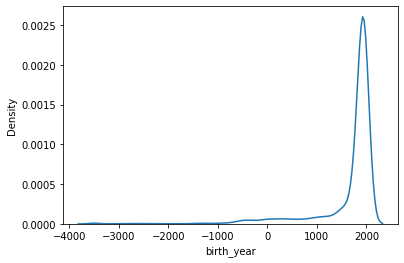

In [197]:
sns.kdeplot(df['birth_year'])

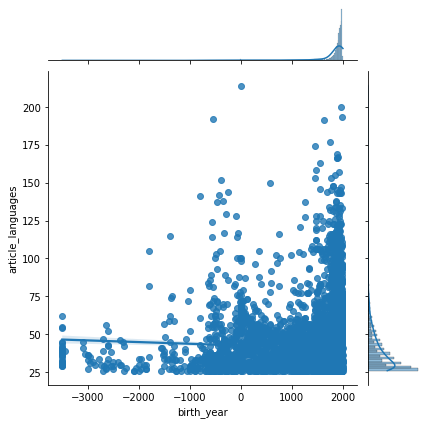

In [198]:
sns.jointplot(x='birth_year', y='article_languages', data=df, kind='reg')

<AxesSubplot:xlabel='continent', ylabel='count'>

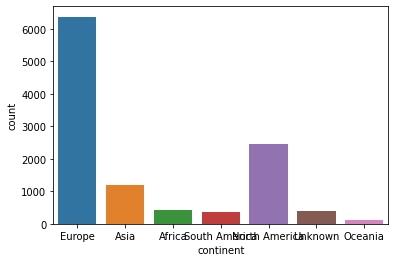

In [199]:
sns.countplot(x='continent',data=df)

<AxesSubplot:xlabel='country', ylabel='count'>

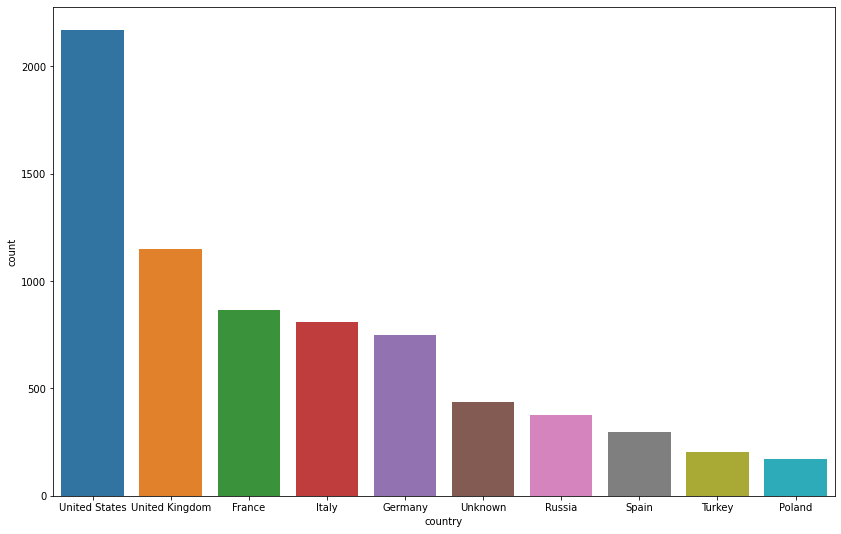

In [200]:
plt.figure(figsize=(14,9))
sns.countplot(x='country',data=df, order=df.country.value_counts().iloc[:10].index)

In [201]:
df.continent.value_counts()

Europe           6368
North America    2439
Asia             1188
Africa            419
Unknown           408
South America     366
Oceania           123
Name: continent, dtype: int64

<AxesSubplot:xlabel='domain', ylabel='count'>

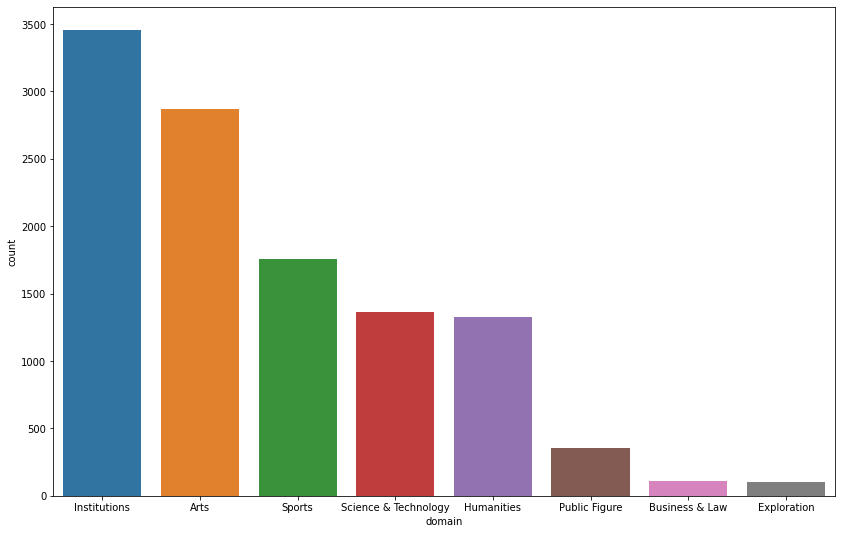

In [202]:
plt.figure(figsize=(14,9))
sns.countplot(x='domain',data=df, order=df.domain.value_counts().iloc[:10].index)

In [203]:
#There will be multiple eras, in every era, there will be most dominant continent,countries,domains,gender,industries
#avg. popularity index
#which countries are leading in which domains
#influence of domains,continents,countries in overall total historical score and frequency
#can take inspiration from 2 other notebooks written in ggplot and for era analysis on 20th centuary analysis

In [204]:
df.continent.unique()

array(['Europe', 'Asia', 'Africa', nan, 'South America', 'North America',
       'Unknown', 'Oceania'], dtype=object)

# So let's start with a brief view on entire dataset! 

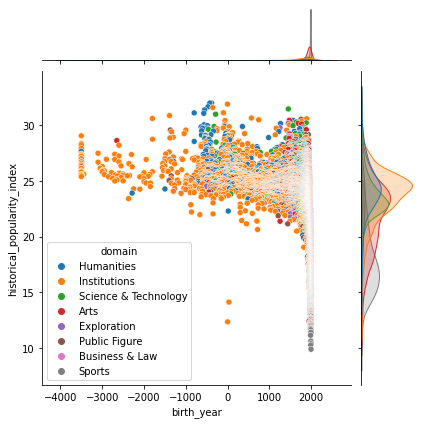

In [205]:
sns.jointplot(x='birth_year', y='historical_popularity_index', data=df, hue="domain")

By looking at the above jointplot, we can observe some relations between popularity index, birth-year and domain. We can clearly see the domination of *Instutitions* domain. Also some domains like sports and Exploration are pretty low in popularity index.Also domains like Public figure came into existance pretty late.
Now, let's see how geometry has affected mankind.

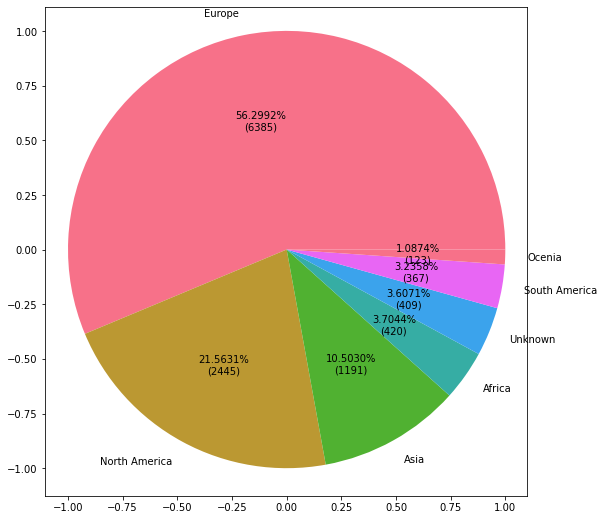

In [206]:
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, 11341*x/100)

plt.figure(figsize=(14,9))
data = df.continent.value_counts()
labels = ['Europe', 'North America', 'Asia', 'Africa', 'Unknown', 'South America', 'Ocenia']
colors = sns.color_palette('husl')
plt.pie(data, labels=labels,colors = colors, autopct = my_fmt, frame=True)
plt.show()

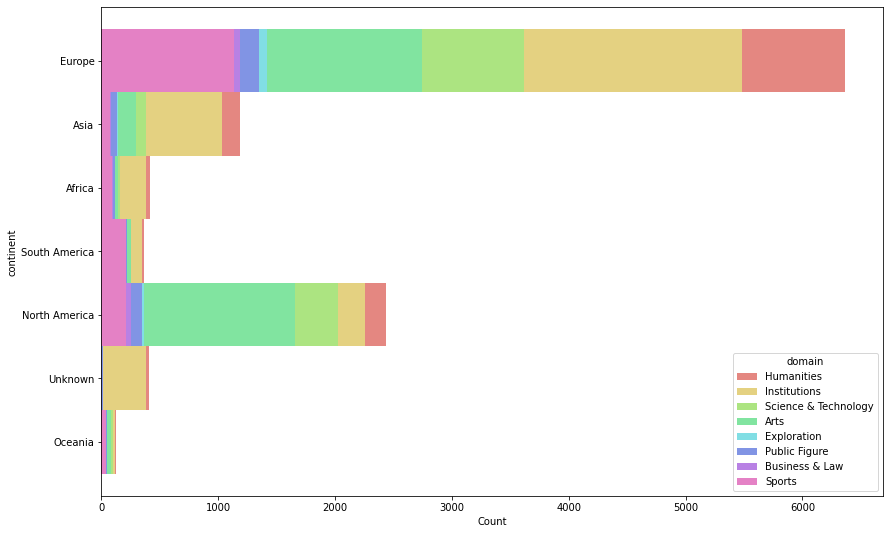

In [207]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

plt.figure(figsize=(14,9))
p = sns.histplot(data = df, y="continent", hue="domain", palette="hls", multiple="stack", linewidth=0,)
# show_values(p, "h", space=0)



Here we can see that continentwise Europe is totally leading, followed by North America and Asia. Ocenia is at last place as it was discovered very late in history. Domainwise we can see that except for North America, every other continent has *Institutions* as most popular domain, while North America has Arts as leading domain. (Arts includes cinema, crafts, and music as well)

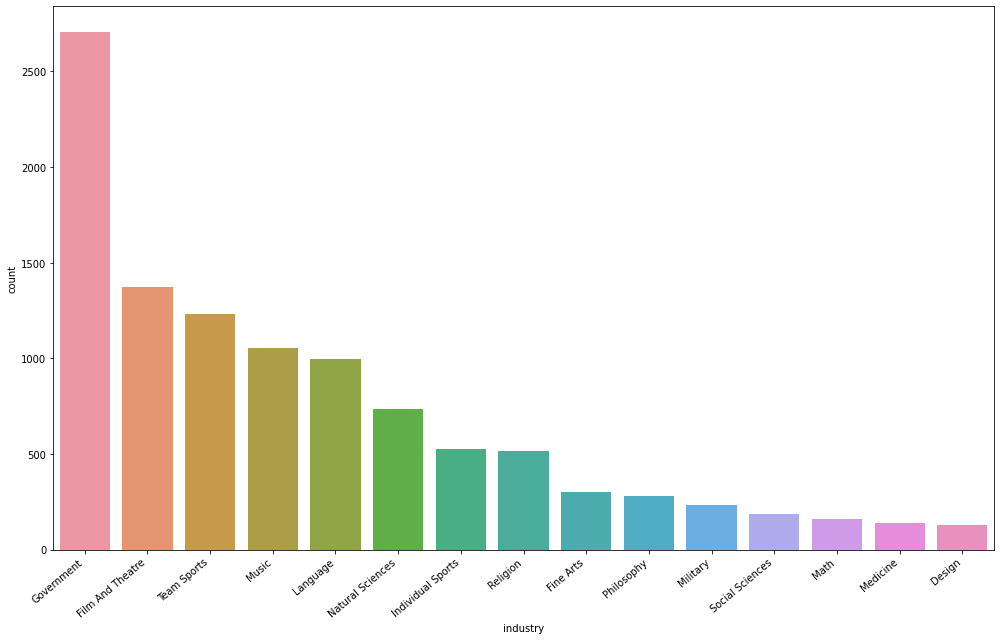

In [208]:
plt.figure(figsize=(14,9))
ax = sns.countplot(x='industry',data=df, order=df.industry.value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Now you after seeing North America at 3rd place, you might be wondering that you have heard of very few American notable history figures. But you do recognise a ton of American celebrities, that means majority of data in dataset should be from last 2-4 centuries, especially of America's.
Let's check it out.

(1000.0, 2000.0)

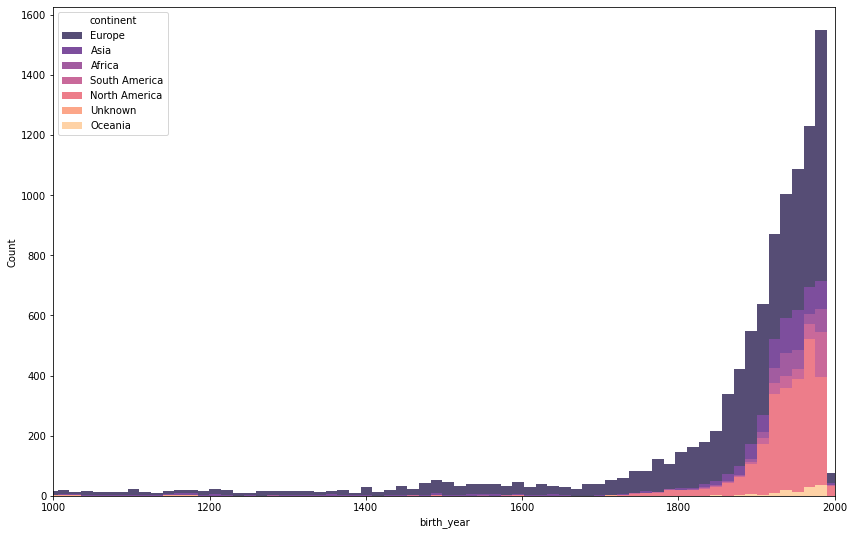

In [209]:
plt.figure(figsize=(14,9))
sns.histplot(data = df,x="birth_year", hue="continent", palette="magma", multiple="stack", linewidth=0)
plt.xlim (1000,2000)

As seen in the graph, our intuition was absolutely correct. Now let's check genderwise contribution.

<AxesSubplot:xlabel='continent', ylabel='birth_year'>

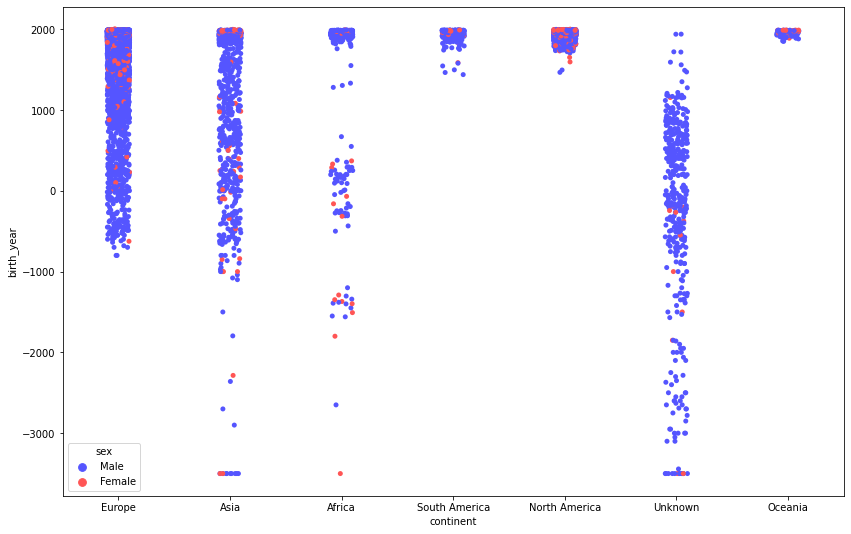

In [210]:
plt.figure(figsize=(14,9))
sns.stripplot(x='continent',y='birth_year',data=df, hue='sex', 
             palette='seismic')

The plot suggests that in the dataset, no. of males is significantly higher than no. of females. While (contradictory to popular belief) contribution of females can be seen throught entire timeline except for North America, where it is relatively higher in recent times.